In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.stattools import adfuller

In [43]:
df = pd.read_csv('./ressource/Brief-Dataset-Consumption.csv' , index_col='Date', parse_dates=True)
df.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


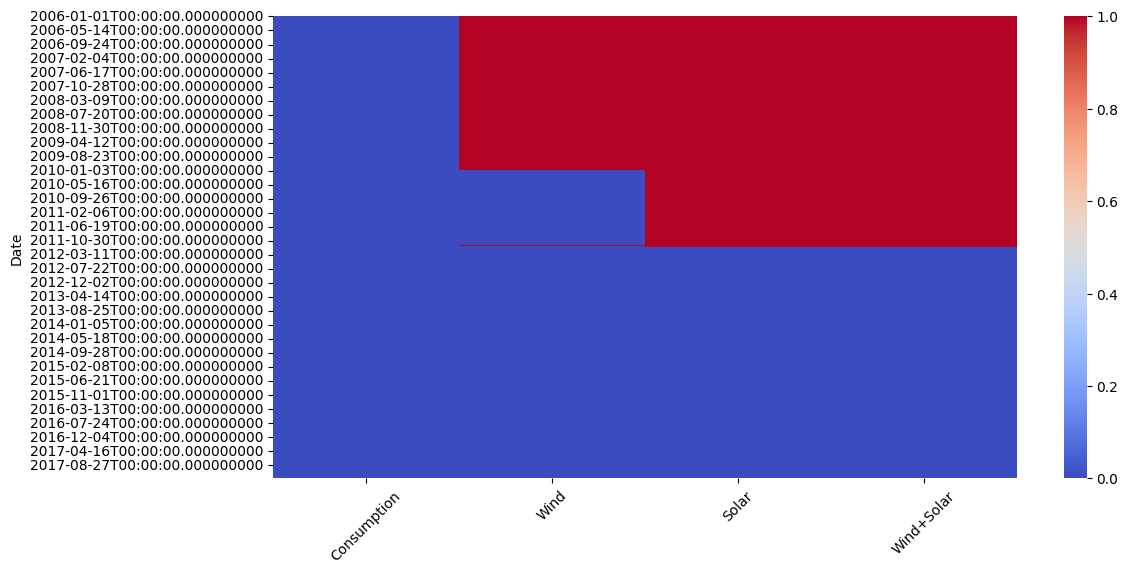

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
heatmap = sns.heatmap(df.isna(), cmap='coolwarm')
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45)
plt.show()

In [45]:
df['Consumption'].dtype

dtype('float64')

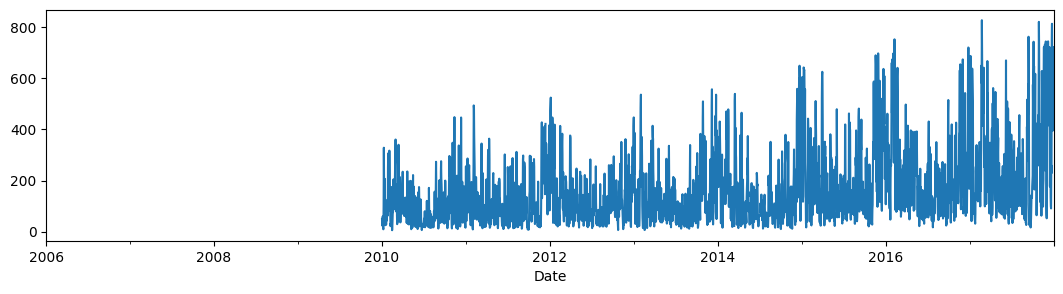

In [46]:
df['Wind'].plot(figsize=(13, 3))
plt.show()

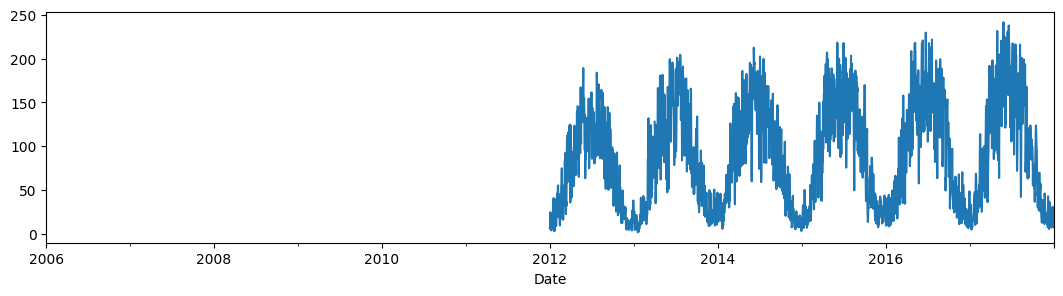

In [47]:
df['Solar'].plot(figsize=(13, 3))
plt.show()

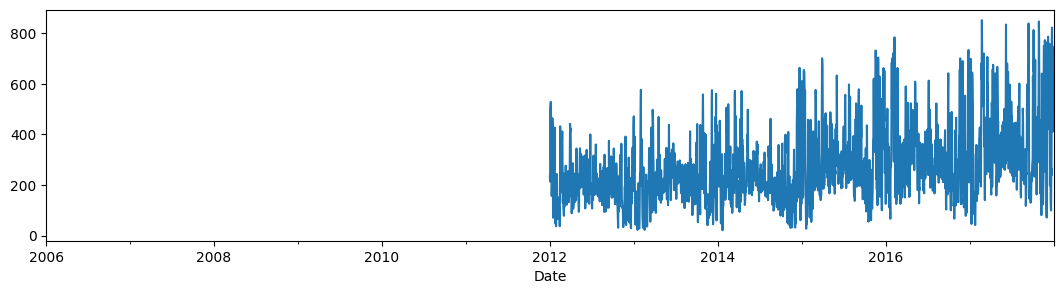

In [48]:
df['Wind+Solar'].plot(figsize=(13, 3))
plt.show()

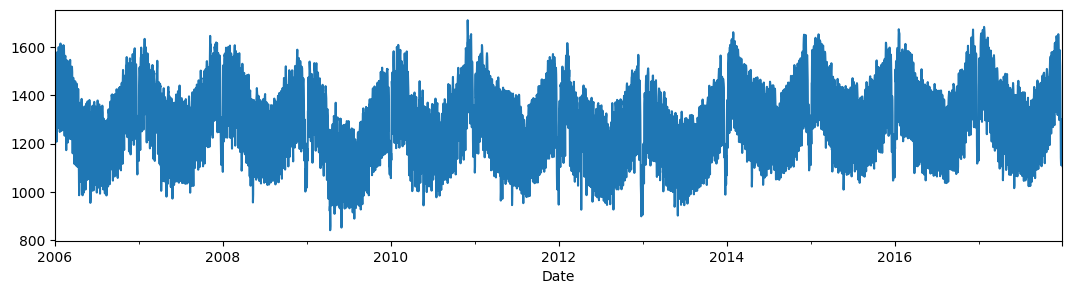

In [49]:
df['Consumption'].plot(figsize=(13, 3))
plt.show()

In [50]:
dfadfu = adfuller(df['Consumption'], autolag='AIC')

dfoutput = pd.Series(dfadfu[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dfadfu[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Test Statistic                -6.239148e+00
p-value                        4.744055e-08
#Lags Used                     3.100000e+01
Number of Observations Used    4.351000e+03
Critical Value (1%)           -3.431854e+00
Critical Value (5%)           -2.862205e+00
Critical Value (10%)          -2.567124e+00
dtype: float64


In [51]:
df['Consumption'].dtype

dtype('float64')

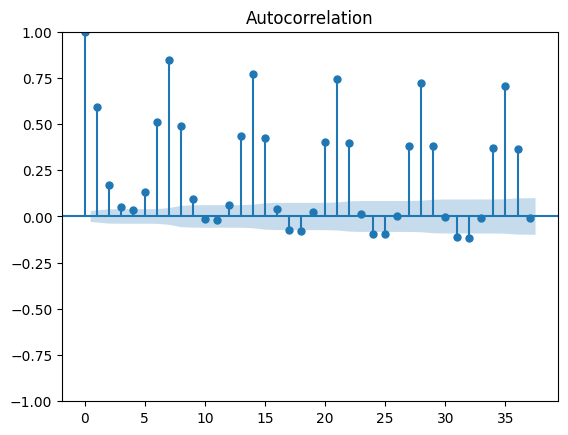

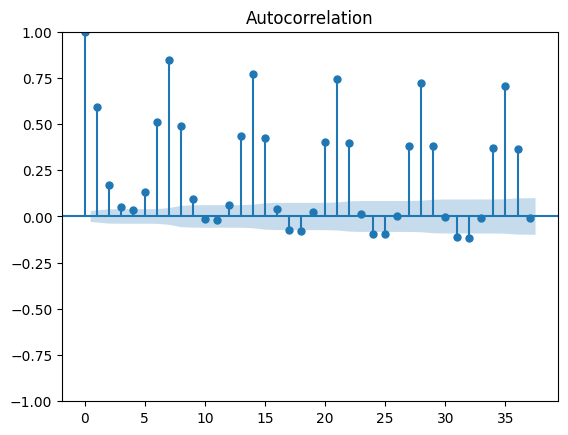

In [52]:
import statsmodels.tsa.stattools as stattools
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot the ACF
plot_acf(df['Consumption'])

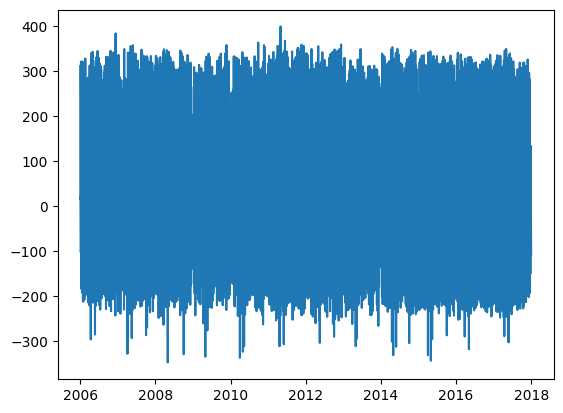

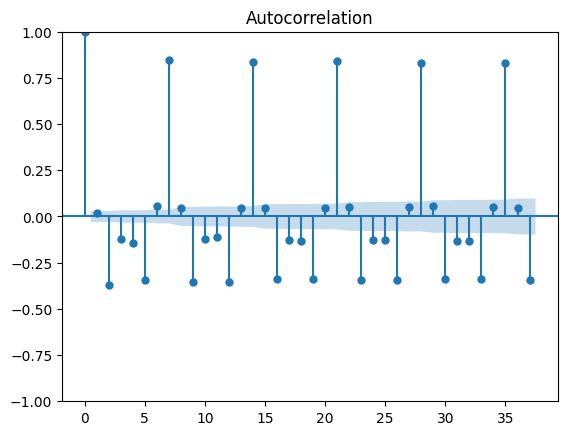

In [53]:
plt.plot(df['Consumption'].diff())
plot_acf(df['Consumption'].diff().dropna())
plt.show()

In [54]:
import matplotlib.pylab as plt #for visualization


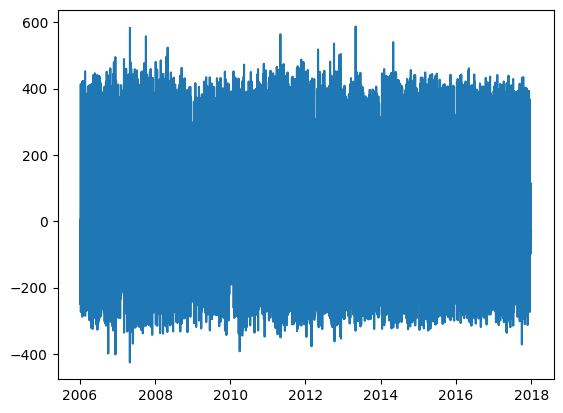

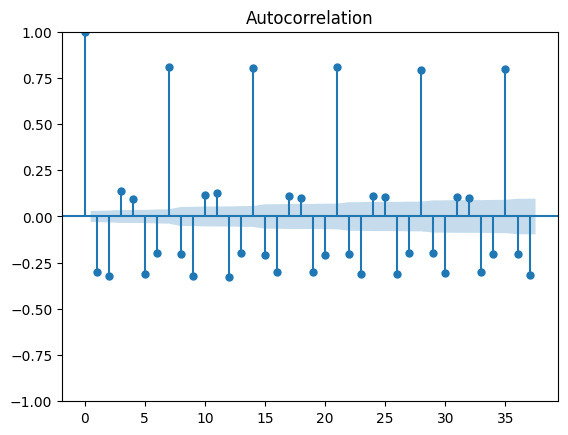

In [55]:
# 2nd Differencing
plt.plot(df['Consumption'].diff().diff())
plot_acf(df['Consumption'].diff().diff().dropna())
plt.show()

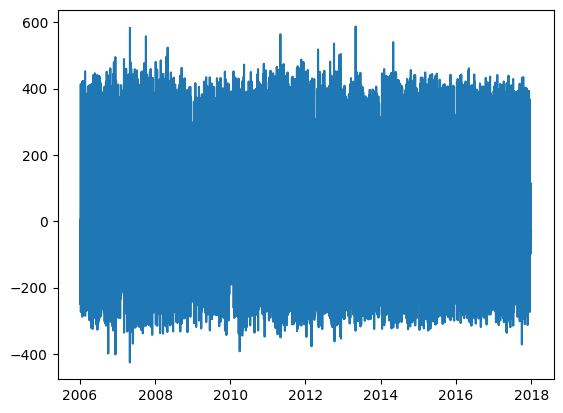

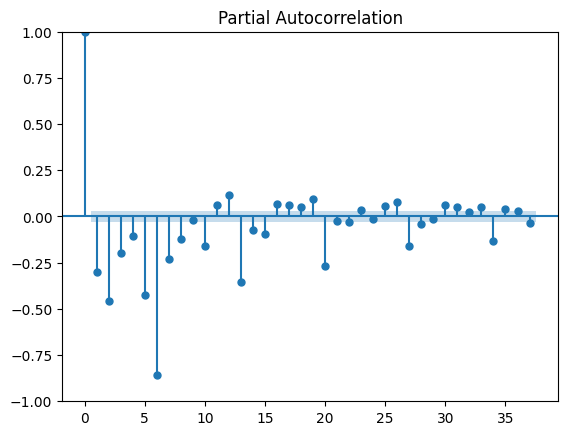

In [56]:
# PACF plot of 2st differenced series
plt.plot(df['Consumption'].diff().diff())
plot_pacf(df['Consumption'].diff().diff().dropna())
plt.show()

In [57]:
#df['Consumption'] = df['Consumption'].diff()

In [58]:
train_data = df['Consumption'].iloc[:-365]
test_data = df['Consumption'].iloc[-365:]

In [61]:
from tbats import TBATS

model = TBATS( seasonal_periods=[7, 365])
results=model.fit(train_data)

print(results.summary())

Use Box-Cox: False
Use trend: False
Use damped trend: False
Seasonal periods: [  7. 365.]
Seasonal harmonics [ 3 21]
ARMA errors (p, q): (5, 1)
Smoothing (Alpha): 0.089522
Seasonal Parameters (Gamma): [ 5.09277047e-06 -5.12748876e-05 -7.82881167e-05  9.10954551e-06]
AR coefficients [-7.82881167e-05  9.10954551e-06  5.95789821e-03 -1.02537852e-01
 -5.38457916e-02]
MA coefficients [0.41883828]
Seed vector [ 1.40211007e+03 -1.37308475e+02 -6.77951490e+01 -3.04250471e+01
  5.37090279e+01  4.56805036e+01  1.92383645e+01  9.19170786e+01
 -2.05049719e+00 -3.27971900e+01 -2.10995102e+01 -3.07556202e+01
 -1.57255358e+01 -2.41557404e+01 -2.26387292e+01 -1.48725172e+01
 -1.05452776e+01 -1.18913239e+01 -1.69000927e+01 -1.18150546e+01
 -5.02540545e+00 -6.72133399e+00 -6.76404233e+00 -6.04666384e+00
 -5.90882211e+00 -4.93036257e+00 -1.69628079e+00 -4.10208959e+00
  6.72454540e+00  7.99734903e+00  5.97092079e+00 -3.92929106e+00
 -1.57140145e-01  8.51715894e+00  1.87050402e+00  6.52449355e+00
  8.1373

In [63]:
results


In [67]:

"""# Prédictions pour les 10 prochaines observations
predictions = results.predict(start=len(df), end=len(df) + 365)

# Affichage des prédictions
print(predictions)"""

#predicted_values = results.predict(start=df.index[-2], end=df.index[-1])
predicted_values = results.forecast(365,)
# Afficher les résultats
print('Erreur de prévision RMSE :', round(np.sqrt(np.mean((predicted_values - test_data)**2)), 2))



Erreur de prévision RMSE : 73.17


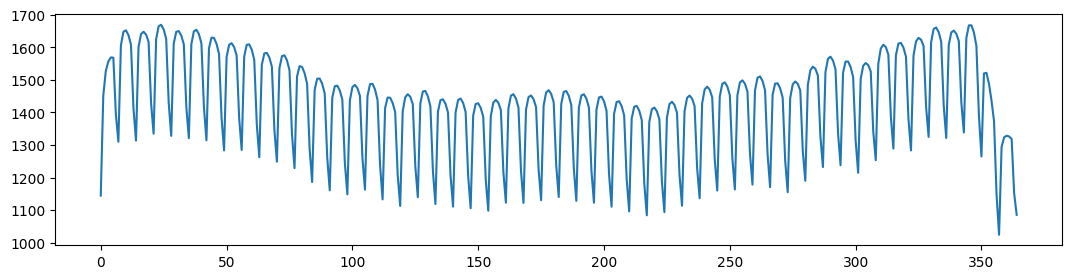

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the predicted values to a Pandas Series
predicted_values_series = pd.Series(predicted_values)

# Plot the predicted values
predicted_values_series.plot(figsize=(13, 3))
plt.show()


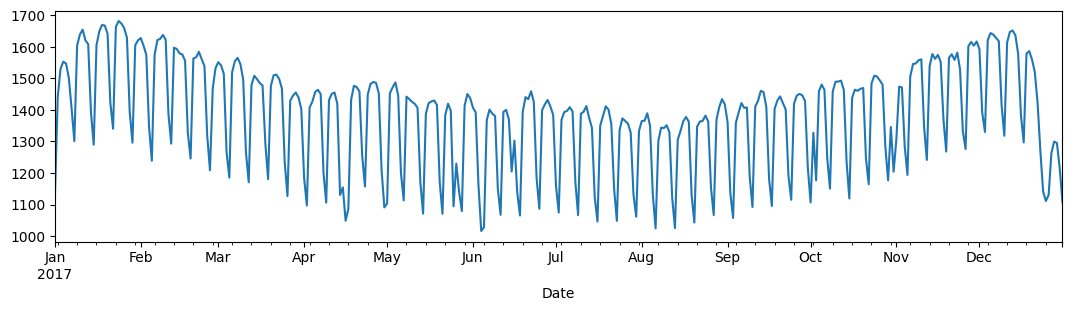

In [75]:
test_data.plot(figsize=(13, 3))
plt.show()


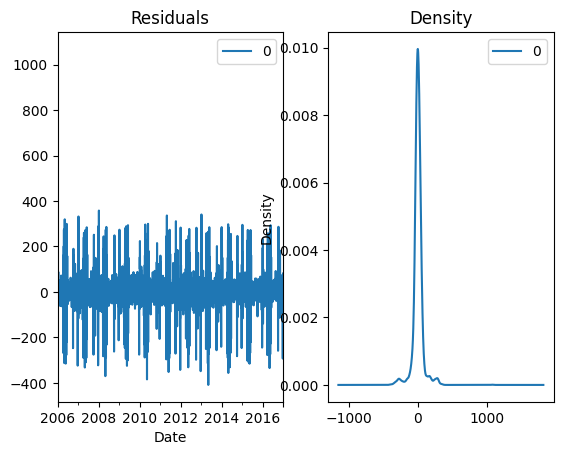

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(results.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

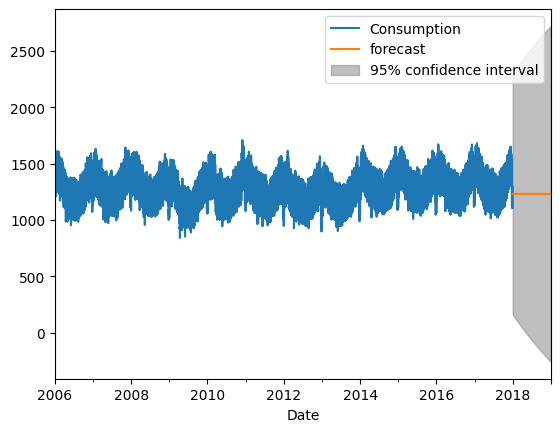

In [ ]:
from statsmodels.graphics.tsaplots import plot_predict
# Actual vs Fitted


fig, ax = plt.subplots()
ax = df['Consumption'].loc['2006':].plot(ax=ax)
plot_predict(results, '2018','2019', ax=ax)
plt.show()
